# Function Fitting

### load data & set functions

In [1]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
import DC_Pickle as dcp
import Curve_Functions as cv
import matplotlib.pyplot as plt
%matplotlib inline

def cost_Function(true_y, pred_y):
    diff = np.power((true_y - pred_y), 2)
    cost = np.sum(diff)
    return cost

def curve_Fitting(func, x, y, name):
    fig, ax = plt.subplots(1, 1, figsize=(10,8))
    
    popt, pcov = curve_fit(func, x, y, maxfev = 1000000)

    upper_bound = []
    lower_bound = []
    for i in range(len(pcov)):
        upper_bound.append(popt[i] + pcov[i,i])
        lower_bound.append(popt[i] - pcov[i,i])

    x_fit = np.linspace(0, 15, 100)
    if len(popt) == 1:
        y_mean = func(x_fit, popt[0])
        y_upper = func(x_fit, upper_bound[0])
        y_lower = func(x_fit, lower_bound[0])
        cost = cost_Function(y, func(x, popt[0]))
    
    elif len(popt) == 2:
        y_mean = func(x_fit, popt[0], popt[1])
        y_upper = func(x_fit, upper_bound[0], upper_bound[1])
        y_lower = func(x_fit, lower_bound[0], lower_bound[1])
        cost = cost_Function(y, func(x, popt[0], popt[1]))
    
    elif len(popt) == 3:
        y_mean = func(x_fit, popt[0], popt[1], popt[2])
        y_upper = func(x_fit, upper_bound[0], upper_bound[1], upper_bound[2])
        y_lower = func(x_fit, lower_bound[0], lower_bound[1], lower_bound[2])
        cost = cost_Function(y, func(x, popt[0], popt[1], popt[2]))

    elif len(popt == 4):
        y_mean = func(x_fit, popt[0], popt[1], popt[2], popt[3])
        y_upper = func(x_fit, upper_bound[0], upper_bound[1], upper_bound[2], upper_bound[3])
        y_lower = func(x_fit, lower_bound[0], lower_bound[1], lower_bound[2], upper_bound[3])
        cost = cost_Function(y, func(x, popt[0], popt[1], popt[2], popt[3]))

    print(" - Curve Fitting Parameters: {0}\n".format(popt))
    print(" - Curve Fitting Cost: {0}\n".format(cost))
    print(" - Curve Fitting Covariance: \n{0}".format(pcov))
    
    ax.plot(x, y, 'rx')
    ax.plot(x_fit, y_mean, 'r-', label="curve fitting")    
    for i in range(len(x_fit)):
        if i == 0:
            ax.plot([x_fit[i], x_fit[i]], [y_lower[i], y_upper[i]], 'b-', label="variance")
        else:
            ax.plot([x_fit[i], x_fit[i]], [y_lower[i], y_upper[i]], 'b-')
    
    ax.set_ylim([0, max(y)+0.05])
    ax.legend()
    fig.savefig('Figs/{0}'.format(name, dpi=100))
    
    return popt, pcov, cost

def disp_Data(x_axis, y_axis, colour_shape='b.', rows=1, columns=1, size=(10, 5)):
    fig, axes = plt.subplots(rows, columns, figsize=size)
    axes.plot(x_axis, y_axis, colour_shape)
    plt.show()

In [2]:
data_path = "../../data/pickles/clusters_test/centroid2.pickle"
train_data = dcp.open_Pickle(data_path)
train_data = train_data[:, :, 0]

attempts = np.arange(15)+1 # attempts
scores = train_data[0,:] # centroid of cluster 1

# disp_Data(attempts, scores)

### exponential fit

#### Two parameters

 - Curve Fitting Parameters: [ 0.14980267 -0.04312082]

 - Curve Fitting Cost: 0.07473378959097453

 - Curve Fitting Covariance: 
[[ 0.0011349   0.00066667]
 [ 0.00066667  0.0004652 ]]


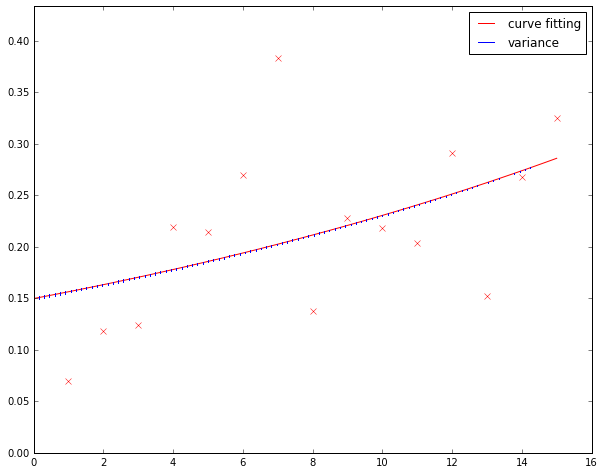

In [3]:
exp2_opt, exp2_cov, exp2_cost = curve_Fitting(cv.exponential_curve2, attempts, scores, 'Exp2')

#### Three parameters

Least Square Parameters: [-0.30827755  0.46263171  0.24977196], Cost: 0.028342201139803628
 - Curve Fitting Parameters: [-0.30827812  0.46263322  0.24977189]

 - Curve Fitting Cost: 0.05668440228302657

 - Curve Fitting Covariance: 
[[ 0.02692519 -0.04416478  0.00109147]
 [-0.04416478  0.11639249 -0.00591084]
 [ 0.00109147 -0.00591084  0.00074548]]


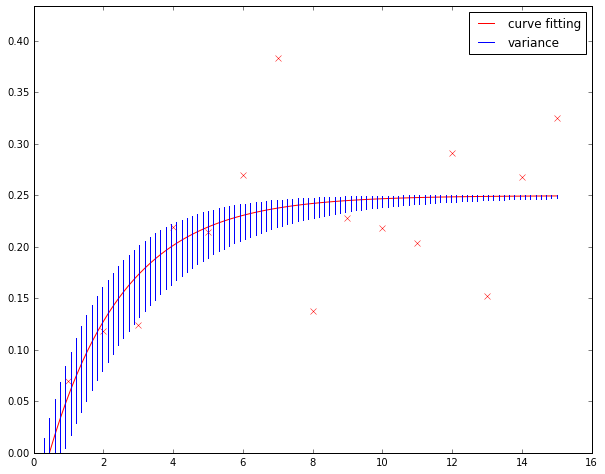

In [4]:
seed = np.array([1, 1, 1])
exp3_lqe = least_squares(cv.exponential_least3, seed, args=(attempts, scores))
print("Least Square Parameters: {0}, Cost: {1}".format(exp3_lqe.x, exp3_lqe.cost))

exp3_opt, exp3_cov, exp3_cost = curve_Fitting(cv.exponential_curve3, attempts, scores, 'Exp3')

### polynoimial fit

 - Curve Fitting Parameters: [ 0.13418852  0.01008499]

 - Curve Fitting Cost: 0.0723515970988412

 - Curve Fitting Covariance: 
[[  1.64314984e-03  -1.59014499e-04]
 [ -1.59014499e-04   1.98768122e-05]]


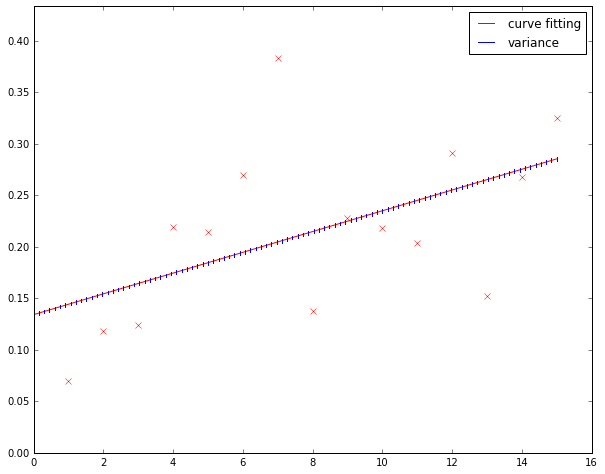

In [5]:
poly_opt, poly_cov, poly_cost = curve_Fitting(cv.polynomial_curve, attempts, scores, 'Poly1')

### power law fit

#### Two parameters

Least Square Parameters: [-0.11538004 -0.32126806], Cost: 0.03233013907518511
 - Curve Fitting Parameters: [-0.11537829 -0.32127514]

 - Curve Fitting Cost: 0.06466027815903502

 - Curve Fitting Covariance: 
[[ 0.00136655 -0.0051584 ]
 [-0.0051584   0.02085899]]


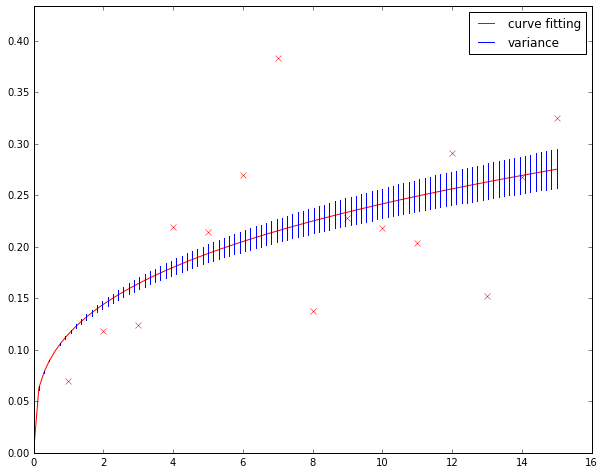

In [6]:
seed = np.array([1, 1])
pl2_lqe = least_squares(cv.powerlaw_least2, seed, args=(attempts, scores))
print("Least Square Parameters: {0}, Cost: {1}".format(pl2_lqe.x, pl2_lqe.cost))

pl2_opt, pl2_cov, pl2_cost = curve_Fitting(cv.powerlaw_curve2, attempts, scores, 'power2')

#### Thress parameters

Least Square Parameters: [ 0.25846093  0.56165839  0.31564167], Cost: 0.029316442977679495
 - Curve Fitting Parameters: [ 0.25846091  0.56165849  0.31564164]

 - Curve Fitting Cost: 0.05863288595545733

 - Curve Fitting Covariance: 
[[ 0.0293563  -0.12509735  0.030035  ]
 [-0.12509735  0.72391851 -0.1563382 ]
 [ 0.030035   -0.1563382   0.03526633]]


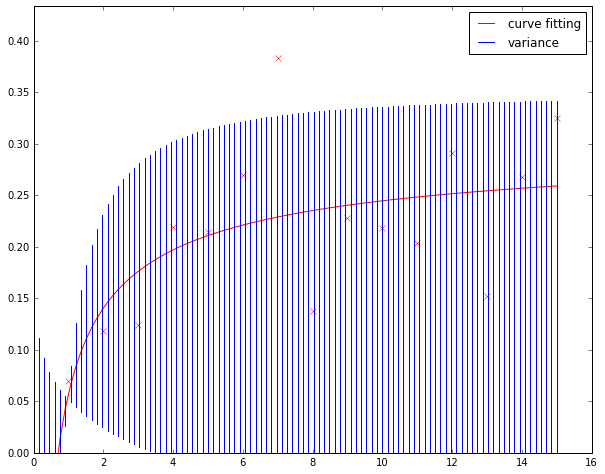

In [7]:
seed = np.array([1, 1, 1])
pl3_lqe = least_squares(cv.powerlaw_least3, seed, args=(attempts, scores))
print("Least Square Parameters: {0}, Cost: {1}".format(pl3_lqe.x, pl3_lqe.cost))

pl3_opt, pl3_cov, pl3_cost = curve_Fitting(cv.powerlaw_curve3, attempts, scores, 'power3')

#### Four parameters

Least Square Parameters: [  1.43010181e+09   8.03743955e+00   2.52953415e-01   1.58673818e+01], Cost: 0.02849964565932253
 - Curve Fitting Parameters: [  2.76418636e+158   7.25431595e+001   2.50095741e-001   1.55281770e+002]

 - Curve Fitting Cost: 0.05672405738203963

 - Curve Fitting Covariance: 
[[              inf               nan               nan               inf]
 [  1.76552547e+162   1.14648245e+003  -1.77407663e-001   1.35336835e+003]
 [ -6.06178796e+156  -1.77407663e-001   8.34076143e-004   1.87756516e+000]
 [  3.83123465e+162   1.35336835e+003   1.87756516e+000   1.53048987e+004]]


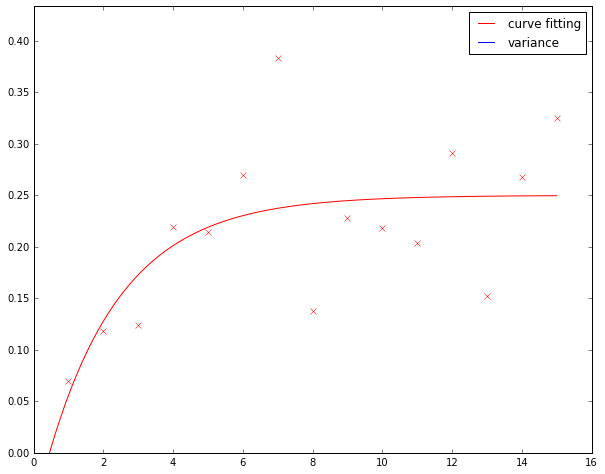

In [8]:
seed = np.array([1, 1, 1, 1])
pl4_lqe = least_squares(cv.powerlaw_least4, seed, args=(attempts, scores))
print("Least Square Parameters: {0}, Cost: {1}".format(pl4_lqe.x, pl4_lqe.cost))

pl4_opt, pl4_cov, pl4_cost = curve_Fitting(cv.powerlaw_curve4, attempts, scores, 'power4')